In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def calculate_annualized_return(returns, period = 'Y'):
    product = np.prod(1+(returns/100)) # multiplication of (1+r)
    if(period == 'Y'):
        annualized_return = product**(1/len(returns))-1
    if(period == 'M'):
        annualized_return = product**(12/len(returns))-1
    return annualized_return*100

### Return
Relative price changes -> useful in comparing different financial instruments (various stocks) or trading strategies.

- **Absolute Return (r):** It measures total gain or loss over the entire time period, it does not consider time. 
$$\text{Absolute Return} = \frac{\text{final value} - \text{initial value}}{(\text{initial value})} \times 100 \%$$

- **Growth Factor (1+r)**: 
It is known as Growth Factor or Compounding Factor  with r being the rate of return. It can be used in determining future value or annaulized return from monthly returns.

$$\text{Future value} = \text{Present value}*{(1+r)}^n$$
- **Annualized Return**
It is a normalized return over n the number of years with RoR of ($r_1, r_2, ..., r_n$). If r is at a monthly basis then n will be fraction of the year (e.g.: for 5 months, it will be 5/12). 

$$\text{Annualized Return} =  {\displaystyle \prod_{i = 1}^{n}(1+r_{i})}^{1/n}-1$$

- **Excess Return**
Excess returns are the returns generated by a risky investment over and above the returns on a risk-free investment. The most widely used measure of the return on a risk-free investment is a short-term Treasury bill, or T-Bill, which is issued by the U.S. government.

- **Total return:** Includes capital gain and income (like dividens and interest)
- **Rate of return (RoR)**: While rate of return (RoR) is over a specific time period. So, it can be same as of absolute return over one time period but, it is not the case for any other case. The other interesting terminology from RoR is:

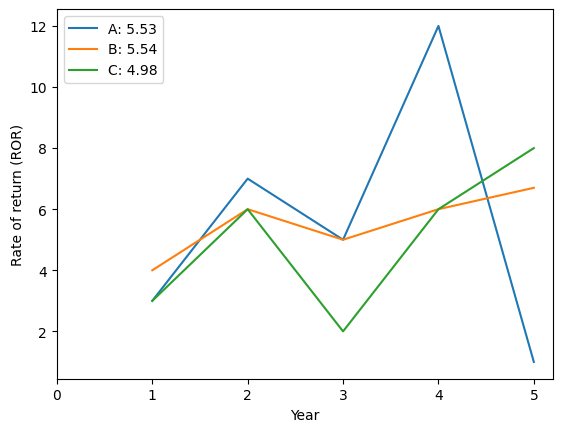

In [64]:
# Annual rate of return
r_a = np.array([3, 7, 5, 12, 1])
r_b = np.array([4, 6, 5, 6, 6.7])
r_c = np.array([3, 6, 2, 6, 8])
annualized_return = {}
annualized_return['a'] = calculate_annualized_return(r_a, period = 'Y') 
annualized_return['b'] = calculate_annualized_return(r_b, period = 'Y') 
annualized_return['c'] = calculate_annualized_return(r_c, period = 'Y') 
assets_returns = pd.DataFrame({'a': r_a,
                       'b': r_b,
                       'c': r_c})
assets_returns.index = assets_returns.index + 1
plt.plot(assets_returns.index, assets_returns.a, label = 'A: ' + str(annualized_return['a'].round(2)));
plt.plot(assets_returns.index, assets_returns.b, label = 'B: ' + str(annualized_return['b'].round(2)));
plt.plot(assets_returns.index, assets_returns.c, label = 'C: ' + str(annualized_return['c'].round(2)));

plt.xticks(np.arange(0, 6, 1));
plt.ylabel('Rate of return (ROR)');
plt.xlabel('Year');
plt.legend();

In the above figure, it seems that asset A performs better than asset B. But, in 5-years, annualized return is the similar for both assets.

**Risk and volatility**

Volatility is how the return spreads over time, it is measured as standard deviation of returns. While the risk is negative return or downward deviation.

Volatility (std): 0.0182
Downside Deviation: 0.0118


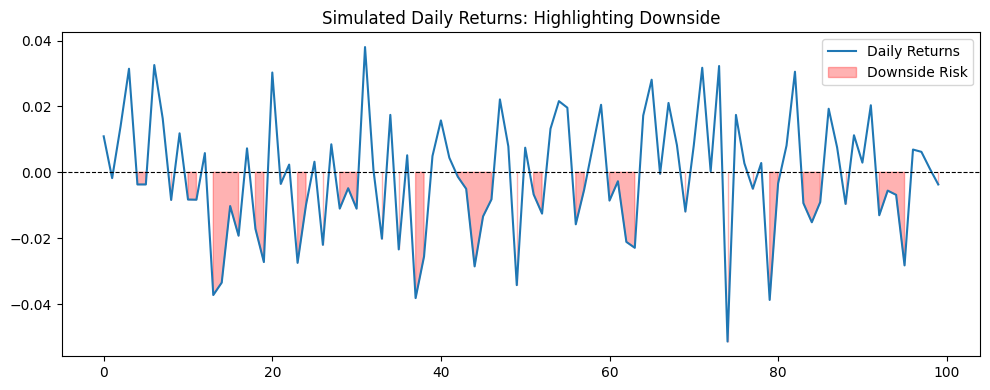

In [88]:
# Simulate 100 daily returns for an asset
np.random.seed(42)
returns = np.random.normal(loc=0.001, scale=0.02, size=100)  # mean=0.1%, std=2%

# Convert to a pandas Series
returns_series = pd.Series(returns)

# Full volatility (standard deviation of all returns)
volatility = returns_series.std()

# Downside deviation (only negative returns)
downside_returns = returns_series[returns_series < 0]
downside_deviation = downside_returns.std()

print(f"Volatility (std): {volatility:.4f}")
print(f"Downside Deviation: {downside_deviation:.4f}")

# Plotting
plt.figure(figsize=(10, 4))
returns_series.plot(label='Daily Returns')
plt.axhline(0, color='black', linewidth=0.8, linestyle='--')
plt.fill_between(returns_series.index, returns_series, 0, where=(returns_series < 0),
                 color='red', alpha=0.3, label='Downside Risk')
plt.title('Simulated Daily Returns: Highlighting Downside')
plt.legend()
plt.tight_layout()
plt.show()


#### Risk-adjusted Return
Risk-adjusted metrics help identify the better-performing investment per unit of risk. Two investments can deliver the same return, but the one with low risk is desirable. Sharpe ratio, Sortino ratio, Treynor ratio, and information ratio are some common metrics to determine **risk-adjusted return**. 

The **Sharpen ratio** is measured as excess return per unit of volatility. $R_p$ and $R_f$ are portfolio return and risk-free rate, respectively while $\sigma_p$ is the standard deviation of portfolio return. 

$$\text{Sharpen Ratio} = \frac{R_p - R_f}{\sigma_p}$$

$$\R_p = \displaystyle \sum_{i=1}^{n} w_i \, \, r_i$$

#### Portfolio weights
- **Based on market capitalization**: It is used as index funds like the S\&P 500.
$$w_i = \frac{\text{market cap}}{\text{total market cap}}$$
- **Equal weighted portfolio**: Every assets gets the same weight.

In [ ]:
weights = [0.4, 0.25, 0.35]
annual_portfolio_return = np.dot(weights, assets_returns.T)
print('Annual portfolio return: ', annual_portfolio_return)
# Aggregated over 5-years
cumulative_return = np.prod(1+(annual_portfolio_return/100)) - 1
print('Cumulative return over five years: ', cumulative_return.round(2))
print('Annualized return:' , calculate_annualized_return(annual_portfolio_return, period = 'Y') )

Annual portfolio return:  [3.25  6.4   3.95  8.4   4.875]
Cumulative return over five years:  0.3
Annualized return: 5.36


In [ ]:
np.std(annual_portfolio_return)

np.float64(1.843773304937459)